# ЛР №1

### Импорт библиотек

In [44]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import warnings
warnings.filterwarnings('ignore')
sns.set(style="ticks")
%matplotlib inline

### Загрузка данных

In [45]:
data = pd.read_csv('StudentsPerformance.csv', sep = ',' )

## 2)Основные характеристики датасета

In [46]:
# Первые пять строк датасета
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [47]:
# Размер датасета
data.shape

(1000, 8)

In [48]:
# Количество нулевых элементов
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [49]:
 # Колонки и их типы данных
data.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [50]:
# Описание датасета
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [51]:
# Статистические данные
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [52]:
# Удаляем столбец lunch
data = data.drop('lunch', axis = 1)

In [53]:
# Первые пять строк датасета
data.head()

,gender,race/ethnicity,parental level of education,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,none,72,72,74
1,female,group C,some college,completed,69,90,88
2,female,group B,master's degree,none,90,95,93
3,male,group A,associate's degree,none,47,57,44
4,male,group C,some college,none,76,78,75


In [54]:
# Определим уникальные значения для целевого признака
data['race/ethnicity'].unique()

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

## 3) Визуальное исследование датасета

array([[<AxesSubplot:title={'center':'math score'}>,
        <AxesSubplot:title={'center':'reading score'}>],
       [<AxesSubplot:title={'center':'writing score'}>, <AxesSubplot:>]],
      dtype=object)

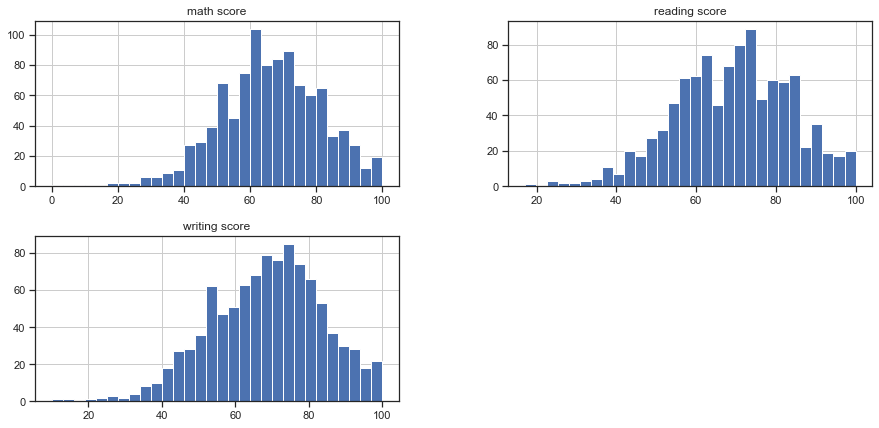

In [55]:
# Гистограммы для всех признаков
data.hist(bins=30, figsize = (15,7))

<Figure size 864x432 with 0 Axes>

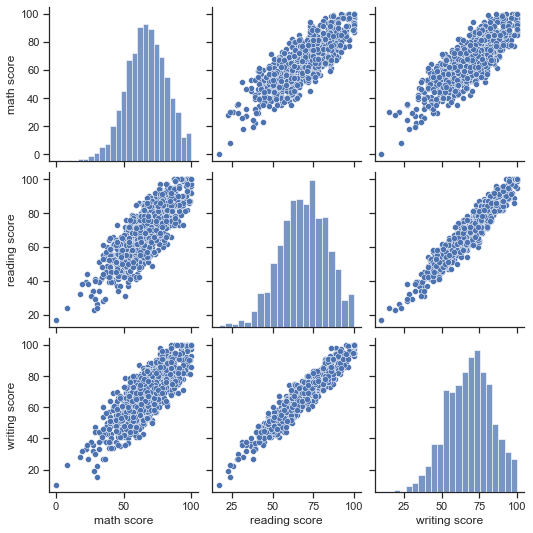

In [56]:
# Диаграммы рассеяние для всех признаков
plt.figure(figsize=(12,6))
sns.pairplot(data)

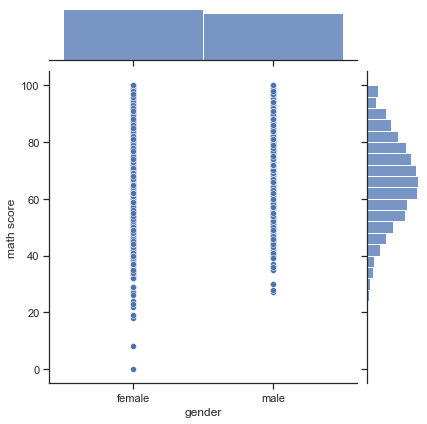

In [57]:
# Увеличенные диаграммы рассеяния для признаков, которые имеют зависимость
sns.jointplot(x = "gender", y = "math score", kind="scatter", data = data)

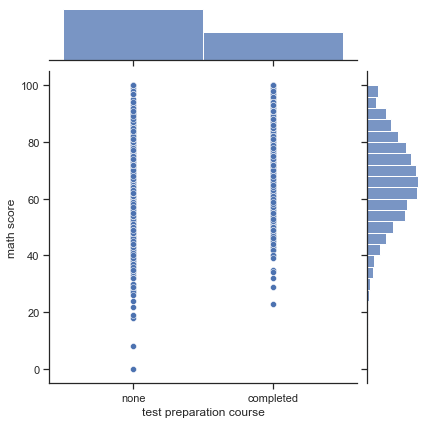

In [58]:
sns.jointplot(x = "test preparation course", y = "math score", kind="scatter", data = data)

<AxesSubplot:xlabel='reading score'>

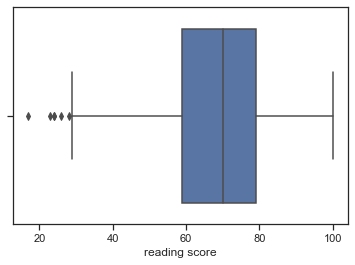

In [59]:
# Одномерное распределение вероятности
sns.boxplot(x=data['reading score'])

<AxesSubplot:xlabel='reading score'>

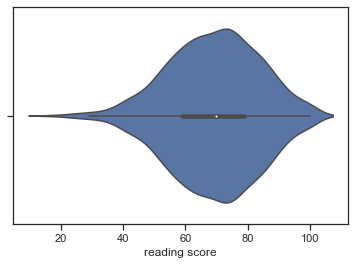

In [60]:
sns.violinplot(x=data['reading score'])

## 4) Корреляции признаков

In [61]:
corr_matrix = data.corr()

In [62]:
corr_matrix['writing score']

math score       0.802642
reading score    0.954598
writing score    1.000000
Name: writing score, dtype: float64

<AxesSubplot:>

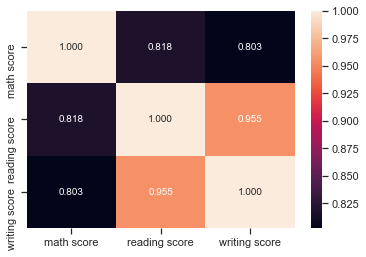

In [63]:
sns.heatmap(data.corr(), annot=True, fmt='.3f')